In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

In [2]:
df = pd.read_csv('1632300362534233.csv')
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [3]:
df = df.replace(True, 1)
df = df.replace(False, 0)
df.tail()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
3474,86,2,1,1,1,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,1,1,1,Niavaran,6.800000e+09,226666.67
3476,75,2,0,0,0,Parand,3.650000e+08,12166.67
3477,105,2,1,1,1,Dorous,5.600000e+09,186666.67
3478,82,2,0,1,1,Parand,3.600000e+08,12000.00


Text(0, 0.5, 'Price')

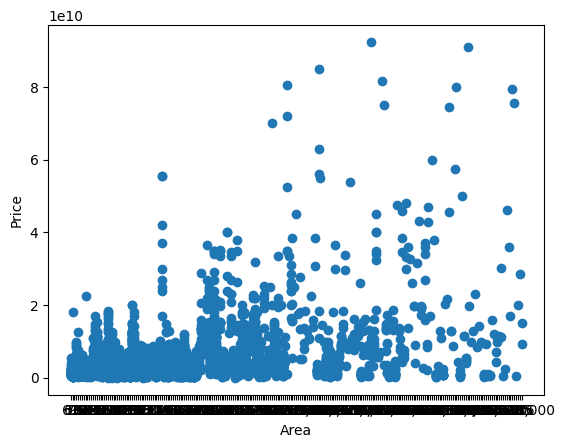

In [4]:
plt.scatter(df.Area, df.Price)
plt.xlabel('Area')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

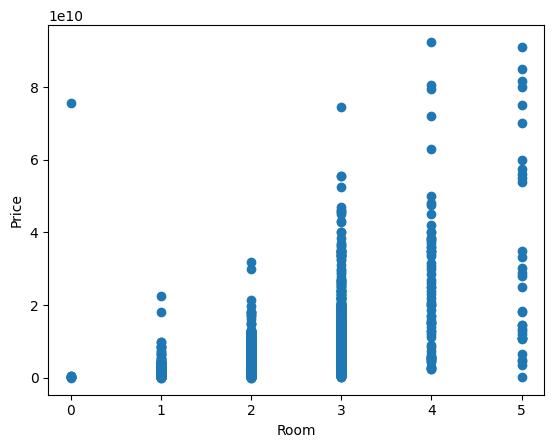

In [5]:
plt.scatter(df.Room, df.Price)
plt.xlabel("Room")
plt.ylabel('Price')

Text(0, 0.5, 'Price')

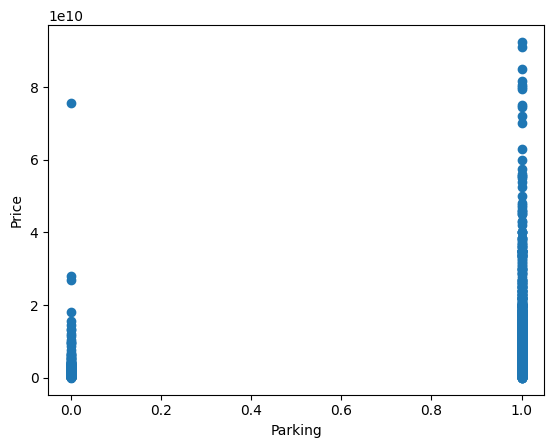

In [6]:
plt.scatter(df.Parking, df.Price)
plt.xlabel("Parking")
plt.ylabel('Price')

Text(0, 0.5, 'Price')

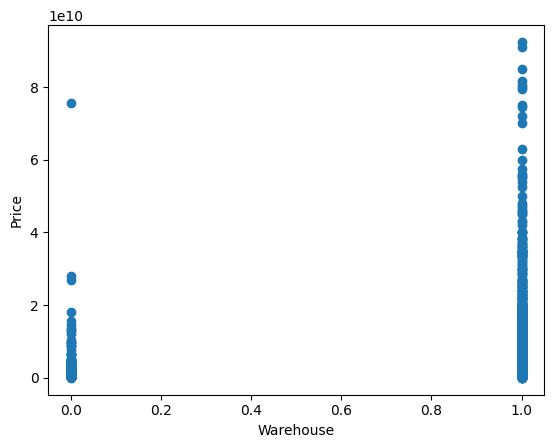

In [7]:
plt.scatter(df.Warehouse, df.Price)
plt.xlabel("Warehouse")
plt.ylabel('Price')

### Preprocessing

In [8]:
index_wrong_address = []
for i in range(len(df.Address)):
    if str(df.Address[i]).lower() == 'nan': 
        index_wrong_address.append(i)


In [9]:
index_wrong_area = []
for i in range(len(df.Area)):
    try :
        int(df.Area[i])
    except:
        index_wrong_area.append(i)

index_wrong_area

[570, 709, 807, 1604, 2171, 2802]

In [10]:
df.Area[index_wrong_area]

570       3,310,000,000 
709      16,160,000,000 
807               1,000 
1604      8,400,000,000 
2171              3,600 
2802      2,550,000,000 
Name: Area, dtype: object

In [11]:
wrong_index = set(index_wrong_area + index_wrong_address)
print(f'lenth of wrong index is : {len(wrong_index)}')
print(wrong_index)

lenth of wrong index is : 29
{1796, 662, 2071, 2072, 3355, 2337, 807, 2728, 1577, 43, 570, 3262, 706, 2243, 1604, 709, 3401, 2127, 3025, 1108, 1109, 3295, 3176, 3434, 2802, 3315, 3318, 2426, 2171}


In [12]:
df = df.drop(wrong_index)
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,Shahran,1.850000e+09,61666.67
1,60,1,1,1,1,Shahran,1.850000e+09,61666.67
2,79,2,1,1,1,Pardis,5.500000e+08,18333.33
3,95,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,1,1,1,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,1,1,1,Niavaran,6.800000e+09,226666.67
3476,75,2,0,0,0,Parand,3.650000e+08,12166.67
3477,105,2,1,1,1,Dorous,5.600000e+09,186666.67


### Normalize

In [13]:
df['َArea'] = df['Area'].astype(int)
df['Price'] = df['Price'].astype(int)

In [18]:
mean_area = df['َArea'].mean()
mean_price = df['Price'].mean()

In [23]:
for i in range(len(df.Area)):
    df.Area[i] = df.Area[i] / mean_area

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''